# 函数补充

## 解包  星号的作用

可迭代对象 使用* 来拆包

In [10]:
a,b,c=range(3)
print(a,b,c)

0 1 2


In [11]:
a,b,c=range(5)
print(a,b,c)

ValueError: too many values to unpack (expected 3)

使用星号代替剩余元素   拆出来的剩余元素默认保存为一个列表

In [13]:
a,b,*c=range(5)
print(a,b,c)

0 1 [2, 3, 4]


In [14]:
a,*b,c=range(5)
print(a,b,c)

0 [1, 2, 3] 4


In [15]:
*a,b,c=range(5)
print(a,b,c)

[0, 1, 2] 3 4


可以将可迭代对象拆包 作为函数的参数输入

In [10]:
def foo(a,b):
    return b,a

In [17]:
print(foo(*range(2)))

(1, 0)


In [7]:
S = ['a','b']

In [11]:
foo(*S)

('b', 'a')

In [18]:
print(foo(*['a','b']))

('b', 'a')


In [23]:
type(*['a','b'])

TypeError: type() takes 1 or 3 arguments

In [22]:
type(*['a','b'][0])

str

解包之后返回了多个对象  可以索引 但是不能查type

## 匿名函数

匿名函数 输入参数多个 但是输出表达式只能是一个  不能像return一样返回元组解包

In [ ]:
def a(x,y):
    return x+2

In [12]:
a = lambda x,y: x + 2

In [14]:
a(6)

8

In [1]:
(lambda x: x + 2)(6)

8

In [2]:
type(lambda x: x + 2)

function

In [3]:
f = lambda x: x + 2
print(f(6))
print(type(f))

8
<class 'function'>


## 返回函数

不用匿名函数 直接返回

In [1]:
def foo0():
    def foo1():
        def foo2():
            print('foo2')
        return foo2
    return foo1


            

In [3]:
foo0()()()

foo2


In [4]:
def make_pow(n):
    def pow_n(x):
        return x ** n
    return pow_n

square = make_pow(2)
print(square(10))
cube = make_pow(3)
print(cube(10))
print(make_pow(0.5)(100))

100
1000
10.0


使用匿名函数

In [5]:
def make_pow(n):
    return lambda x: x ** n

square = make_pow(2)
print(square(10))
cube = make_pow(3)
print(cube(10))
print(make_pow(0.5)(100))

100
1000
10.0


In [6]:
print(type(square))

<class 'function'>


## 高阶函数

使用函数当做参数的函数

### filter  参数是布尔值

In [11]:

# filter()函数是python内置的另一个有用的高阶函数
 
# filter()函数接收一个函数f和一个list,
# 这个函数f的作用是对每个元素进行判断,返回True或False
# filter()根据判断结果自动过滤掉不符合条件的元素
# 返回由符合条件元素组成的新list
 
# a = [1, 2, 3, 4, 5, 6]

a = [i for i in range(1,7)]
 
b = filter(lambda x: x % 2 == 1, a)
 
print(b)                                                    # <filter object at 0x。。。>

# for i in b:
#     print(i)
    
list(b)

[1, 3, 5]

In [18]:
dir(b)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [17]:
list(b)

[1, 3, 5]

In [ ]:
for item in b:
    print(item)                                             # 1 3 5
 
print([item for item in filter  \
       (lambda x: x % 2 == 1, a)])   # [1, 3, 5]
 
# 使用列表解析来实现
 
print([item for item in a if item % 2 == 1])                # [1, 3, 5]

In [20]:
stu_score = {'xiaobai':50,'xiaohei':30,'xiaolan':80,'xiaojun':100,
             'xiaoming':60}

result=filter(lambda score:score>60,stu_score.values())
print(list(result))

[80, 100]


### map 参数是任何函数

map返回了特殊的map对象 可以迭代 但是并不是列表

In [2]:
a=map(lambda x:x*x,[1,2,3,4,5,6])

In [7]:
print(a)

In [6]:
for i in a:
    print(i)

1
4
9
16
25
36


In [12]:
[range(10)]

[range(0, 10)]

In [ ]:
def isprime(n):
    return True
    
filter(isprime,[i for i in range(1,1001)])

In [16]:
list_x = [1, 2, 3, 4, 5, 6, 7, 8]
r = map(lambda x:x*x,list_x)
print(list(r))

[1, 4, 9, 16, 25, 36, 49, 64]


对双列表map

In [15]:
list_x = [1, 2, 3, 4, 5, 6, 7, 8]
list_y = [1, 2, 3, 4, 5, 6, 7, 8]
d = map(lambda x,y:x*x+y,list_x,list_y)
print(list(d))

[2, 6, 12, 20, 30, 42, 56, 72]


In [17]:
list_x = [1, 2, 3, 4, 5, 6, 7, 8]
list_y = [1, 2, 3]
d = map(lambda x,y:x*x+y,list_x,list_y)
print(list(d))

[2, 6, 12]


In [18]:
list_x = [1, 2, 3,4]
list_y = [1, 2, 3, 4, 5, 6, 7, 8]
d = map(lambda x,y:x*x+y,list_x,list_y)
print(list(d))

[2, 6, 12, 20]


### sorted

sorted(iterable, cmp=None, key=None, reverse=False)

iterable -- 可迭代对象。

key -- 主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序。

reverse -- 排序规则，reverse = True 降序 ， reverse = False 升序（默认）

In [24]:
sorted(["Yoav", "Amir", "Amiram", "Haim"])

['Amir', 'Amiram', 'Haim', 'Yoav']

In [25]:
sorted(["Yoav", "Amir", "Amiram", "Haim"], key=len)

['Yoav', 'Amir', 'Haim', 'Amiram']

In [26]:
sorted(["Yoav", "Amir", "Amiram", "Haim"], key=lambda x: x[::-1])

['Amiram', 'Haim', 'Amir', 'Yoav']

In [27]:
def comparator(x):
    return x[::-1]
sorted(["Yoav", "Amir", "Amiram", "Haim"], key=comparator)

['Amiram', 'Haim', 'Amir', 'Yoav']

In [28]:
sorted(["Yoav", "Amir", "Amiram", "Haim"], key=lambda x: x[1])

['Haim', 'Amir', 'Amiram', 'Yoav']

In [31]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [19]:
a = [4,2,3]
# a.sort()

In [21]:
a

[4, 2, 3]

In [20]:
b = sorted(a)
b

[2, 3, 4]

### 返回嵌套函数 函数组合

In [23]:
def compose(f1,f2):
    def composed(x):
        return f2(f1(x))
    return composed

In [24]:
from math import sqrt

In [26]:
sqrt = compose(lambda x: x ** 2, sqrt)
print(sqrt(5))
print(sqrt(-5))

5.0
5.0


In [22]:
sqrt(5)

5.0

In [46]:
def compose(f1,f2):
    return lambda x: f2(f1(x))

向量点乘

In [47]:
vector_product = lambda x,y: [x[i] * y[i] for i in range(len(x))]
vector_product([1,2,3],[3,2,1])

[3, 4, 3]

向量范数

In [48]:
norm = compose(compose(lambda x: vector_product(x,x), sum), sqrt)
norm([1,2,3])

3.7416573867739413

### reduce

reduce(f, [x1, x2, x3, x4]) = f(f(f(x1, x2), x3), x4)

In [5]:
from functools import reduce

print(reduce(lambda x,y:x+y,[1,2,3,4,5]))

15


reduce的含义是规约，将一个序列规约为一个单独的结果，例如sum就可以用reduce实现，求连乘也可以

## 内置函数

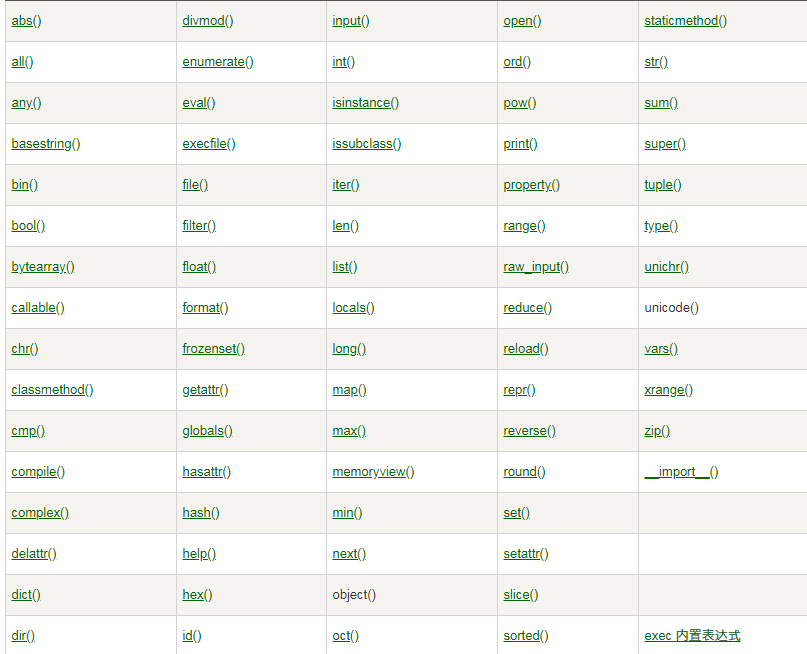

## 函数参数和返回值

按值传递 按引用传递
函数缓存

如果传入可变对象（一般情况），只是相当于把x指针指向对象

In [ ]:
def foo(x)

In [3]:
def foo(x):
    x.append([1,1,1,1])
    
A = [1,2,3,4]
foo(A)
print(A)

[1, 2, 3, 4, [1, 1, 1, 1]]


如果传入不可变对象 会复制一份传入函数 保证作用域内和外的不同

In [4]:
def foo(x):
    x = x + 1

a = 5
foo(a)
print(a)

5


In [1]:
def foo(x):
    x = x + '1'

a = 'str'
foo(a)
print(a)

str


引用修改元组

In [5]:
def foo(x):
    x = (1,2)

a = (2,3)
foo(a)
print(a)

(2, 3)


In [6]:
def foo(x):
    x[1] = 2

a = (2,3)
foo(a)
print(a)

TypeError: 'tuple' object does not support item assignment

必备参数 默认参数

In [1]:
def foo(a,b=3,c=10):
    print(a,b,c)
#     print(a+b)
# foo(1,2,3)
foo(b=5,c=4,a=3)

1 2 3


In [2]:
def foo(a):
    a=5
    
a = 3.5
foo(a)
print(a)

3.5


In [5]:
def foo(a):
    a[1] = 1000

a = [1,2,3]
foo(a)
print(a)

2
[1, 2, 3]


默认参数有坑 最好指向不变的对象 否则多次调用引起默认参数暗中改变

In [8]:
def foo(a = [1,2,3]):
    a.append('x')
    print(a)

foo()
foo()
foo()

[1, 2, 3, 'x']
[1, 2, 3, 'x', 'x']
[1, 2, 3, 'x', 'x', 'x']


* 可以看到虽然函数返回了 所有局部变量都应该释放 
* 但是默认参数a是独立的 指向固定的一个对象
* 如果这个对象是可变对象那就可以不断地改变 非常危险

可变参数
* 一个星号代表了一个可以迭代的对象 作为可变参数
* 在函数里面可以迭代 也可以通过xxx[0]这样索引
* 其实在函数列表里面 <p>*xxx</p>会被拆开为元组 
* 如果单独传递一个元组 只会当成函数列表元组的第一个元素

In [15]:
# def foo(*xxx):
# #     print(type(xxx))
#     for i in xxx:
#         print(i)
B = (6,)
# foo(*B)
# foo(6,7,8)
# a = *B[0]

SyntaxError: can't use starred expression here (<ipython-input-15-69e2a593c051>, line 11)

In [27]:
foo([1,2,3,4],[3,4])

[1, 2, 3, 4]
[3, 4]


In [27]:
def foo(*xxx):
    print(xxx[0])

foo(1,2,3) # 请注意这才是变长参数的写法，不用包装为list

1


如果我疯了就想用list把所有元素搞一遍呢？

用星号可以把列表拆分为变长参数

In [34]:
def foo(*xxx):
    for i in range(len(xxx)):
        print('the '+str(i)+'item:'+str(xxx[i]))

A = [3,4,5,6]
B = (6,7,8)
# foo(A)
# foo(*A)
# foo(B) # B被当成参数列表元组的第一个元素
foo(*B) # *B被解析为参数列表元组 一一对应填入

the 0item:6
the 1item:7
the 2item:8


全种类参数示例

In [14]:
def do_something(name, age, gender='男', *args, **kwds):
    print('姓名：%s，年龄：%d，性别：%s'%(name, age, gender))
    print(args)
    print(kwds)

do_something('xufive', 50, '男', 175, 75, math=99, english=90)

姓名：xufive，年龄：50，性别：男
(175, 75)
{'math': 99, 'english': 90}


zip

In [12]:
a = [1, 2, 3]
b = ["a", "b", "c"]
zip(a, b)  # 返回的是一个对象
list(zip(a, b)) 

[(1, 'a'), (2, 'b'), (3, 'c')]

In [18]:
ll = ["flower", "flow", "flqwe"]
zip(*ll)

In [3]:
ll = ["flower", "flow", "flqwe"]
print(list(zip(*ll)))

[('f', 'f', 'f'), ('l', 'l', 'l'), ('o', 'o', 'q'), ('w', 'w', 'w')]


In [11]:
ll = ["flower", "flow", "flqwe"]
print(*ll)  # 必须在函数调用中使用*ll 直接使用会出问题

flower flow flqwe


In [20]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [4, 5, 6, 7, 8]

a_b_zip = zip(a, b)  # 打包为元组的列表,而且元素个数与最短的列表一致
print("type of a_b_zip is %s" % type(a_b_zip))  # 输出zip函数的返回对象类型
a_b_zip = list(a_b_zip)  # 因为zip函数返回一个zip类型对象，所以需要转换为list类型
print(a_b_zip)
print("------------------------------------------")
a_c_zip = zip(a, c)
a_c_zip = list(a_c_zip)
print(a_c_zip)

nums = [['a1', 'a2', 'a3'], ['b1', 'b2', 'b3'], ['c1', 'c2', 'c3']]
iterator = zip(*nums)  # 参数为list数组时，是压缩数据，相当于zip()函数
print("type of iterator is %s" % type(iterator))  # 输出zip(*zipped)函数返回对象的类型
iterator = list(iterator)  # 因为zip(*zipped)函数返回一个zip类型对象，所以需要转换为list类型
print(iterator)
print("------------------------------------------")
print("a_b_zip ：", a_b_zip)
print("zip(*a_b_zip) ：", list(zip(*a_b_zip)))

type of a_b_zip is <class 'zip'>
[(1, 4), (2, 5), (3, 6)]
------------------------------------------
[(1, 4), (2, 5), (3, 6)]
type of iterator is <class 'zip'>
[('a1', 'b1', 'c1'), ('a2', 'b2', 'c2'), ('a3', 'b3', 'c3')]
------------------------------------------
a_b_zip ： [(1, 4), (2, 5), (3, 6)]
zip(*a_b_zip) ： [(1, 2, 3), (4, 5, 6)]


关键字参数
* 两个星号的关键字参数接受一系列关键字
* 也可以接受<p>**dict</p>由两个星号处理的字典作为参数
* 请注意变长参数和关键字参数的联系
* 变长参数函数接受多个参数 也接受单星号处理的列表和元组（星号就是拆分）
* 关键字参数函数接受多个等号描述的参数 也接受双星号处理的字典（双星号表示拆分）

In [35]:
def foo(**kw):
    print(kw)
foo(city = "hangzhou", age = 19) # 拆分写 注意没有引号





# D = {"city":"hangzhou","age":19} # **处理字典 注意有引号
# foo(**D)

{'city': 'hangzhou', 'age': 19}


其他复杂用法不要使用
* 一共五种参数 必要参数 默认参数 变长参数 命名关键字参数 关键字参数
* 五种参数必须保证先后顺序 不用都有 此处不讲

函数返回值是元组

In [9]:
def foo(x,y):
    return x+1,y+1,x+y

a, b, c= foo(1,2)
print(a,b,c)

2 3 3


In [11]:
type(foo(1,2))

tuple

In [10]:
a,b = foo(1,2)

ValueError: too many values to unpack (expected 2)

匿名函数
* 只能接受参数 返回一个表达式

In [12]:
temp = 10
KK = lambda x:x+temp

In [13]:
KK(10)

20

直接调用匿名函数

In [16]:
(lambda x:x+1) (10)

11

我就是想模拟两行的程序行么？也行，嵌套一个匿名函数当场调用

In [1]:
def K(x):
    x = x + 1
    print(x)

In [2]:
KK = lambda x: print((lambda y:y+1)(x))

In [3]:
K(10)

11


In [4]:
KK(10)

11


## 递归

In [21]:
a,b = 0, 1

while b<100:
    print (b)
    a, b = b, a+b

1
1
2
3
5
8
13
21
34
55
89


二项式定理
​
$$
\binom{n}{k} = \binom{n-1}{k-1} + \binom{n-1}{k} \\\\
\binom{n}{0} = \binom{n}{n} = 1
$$
​
Naive implementation

In [36]:
def binom_naive(n, k):
    if k == n or k == 0:
        return 1
    if n < k or n < 0 or k < 0:
        return 0
    return binom_naive(n - 1, k - 1) + binom_naive(n - 1, k)


In [37]:
%timeit -n 3 binom_naive(6,4)

8.79 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [38]:
%timeit -n 3 binom_naive(26,13)

6.32 s ± 365 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


阶乘公式计算

​
$$
\binom{n}{k} = \frac{n!}{k! (n-k)!} \\\\
n! = n \cdot (n-1)!
$$
​

In [39]:
def binom_formula(n,k):
    return factorial(n) // (factorial(k) * factorial(n - k))

def factorial(n):
    if n == 0: 
        return 1
    return n * factorial(n - 1)

In [14]:
%timeit -n 3 binom_formula(6,4)

4.34 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [15]:
%timeit -n 3 binom_formula(26,13)

19.1 µs ± 757 ns per loop (mean ± std. dev. of 7 runs, 3 loops each)


内存优化

In [40]:
binom_memory = {}

def binom_mem(n, k):
    if k == n or k == 0:
        return 1
    if k > n or n < 0 or k < 0:
        return 0
    key = (n,k)
    if key not in binom_memory:
        binom_memory[key] =  binom_mem(n - 1, k - 1) + binom_mem(n - 1, k)
    return binom_memory[key]

In [10]:
%%timeit -n 3 
binom_memory.clear()
binom_mem(6,4)

13.9 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [41]:
%%timeit -n 3 
binom_memory.clear()
binom_mem(26,13)

240 µs ± 42.9 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [12]:
%%timeit -n 3
binom_mem(26,13)

1.07 µs ± 318 ns per loop (mean ± std. dev. of 7 runs, 3 loops each)


复杂度对比

In [16]:
%timeit -n 100 binom_naive(14,5)
%timeit -n 1000 binom_formula(14,5)
%timeit -n 1000 binom_mem(14,5)

1.12 ms ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.42 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
841 ns ± 54.9 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


杨辉三角

In [17]:
def pascal(n):
    for i in range(n + 1):
        for j in range(i + 1):
            print(binom_mem(i,j), end="\t")
        print()

In [18]:
pascal(7)

1	
1	1	
1	2	1	
1	3	3	1	
1	4	6	4	1	
1	5	10	10	5	1	
1	6	15	20	15	6	1	
1	7	21	35	35	21	7	1	


快速排序

In [19]:
def slowsort(lst):
    """quicksort of list lst"""
    if len(lst) <= 1: 
        return lst
    pivot = lst[0]      # select first element from list
    smaller = [elem for elem in lst if elem < pivot] 
    equal = [elem for elem in lst if elem == pivot]      
    greater = [elem for elem in lst if elem > pivot]
    return slowsort(smaller) + equal + slowsort(greater)

In [20]:
import random

def quicksort(lst):
    """quicksort of list lst"""
    if len(lst) <= 1: 
        return lst
    pivot = random.choice(lst) # select a random element from list
    smaller = [elem for elem in lst if elem < pivot] 
    equal = [elem for elem in lst if elem == pivot]      
    greater = [elem for elem in lst if elem > pivot]
    return quicksort(smaller) + equal + quicksort(greater)

In [33]:
lst = [random.randint(0,100) for _ in range(100000)]

In [34]:
len(lst)

100000

In [22]:
%timeit -n 10 slowsort(lst)

148 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit -n 10 quicksort(lst)

165 ms ± 42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
lst = [i for i in range(1000)]

In [30]:
%timeit -n 10 slowsort(lst)

88 ms ± 7.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit -n 10 quicksort(lst)

5.89 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
import sys
sys.getrecursionlimit()

3000

python设置的最大递归深度并不是系统最大递归深度 

In [36]:
def fib(n):
    if n == 1:
        return 1
    else:
        return fib(n-1) + n

In [38]:
fib(3001)

RecursionError: maximum recursion depth exceeded in comparison

汉诺塔

In [39]:
def move(n, a, b, c):
    '''move n from a to c'''
    if n == 1:
        print(a, '-->', c)
    else:
        move(n-1, a, c, b)
        move(1, a, b, c)
        move(n-1, b, a, c)
a = input('请输入A柱盘子的个数：')
num = int(a)
print('把',num,'个盘子全部移到C柱子的顺序为：')
move(num, 'A', 'B', 'C')

请输入A柱盘子的个数：5
把 5 个盘子全部移到C柱子的顺序为：
A --> C
A --> B
C --> B
A --> C
B --> A
B --> C
A --> C
A --> B
C --> B
C --> A
B --> A
C --> B
A --> C
A --> B
C --> B
A --> C
B --> A
B --> C
A --> C
B --> A
C --> B
C --> A
B --> A
B --> C
A --> C
A --> B
C --> B
A --> C
B --> A
B --> C
A --> C


尾递归优化

为了防止开辟新空间 将中间计算结果直接传入下级进行计算

c语言有尾递归优化 python没有

In [40]:
def recursion(n):
    if n==1:
        return n
    else:
        return n+recursion(n-1) 

In [41]:
recursion(5)

15

recursion(5)

5+recursion(4)

5+(4+recursion(3))

5+(4+(3+recursion(2)))

5+(4+(3+(2+recursion(1))))

5+(4+(3+(2+1)))

15

In [42]:
def tail_recursion(n,total=0):
    if n==0:
        return total
    else:
        return tail_recursion(n-1,  total+n)  

tail_recursion(5,0)

tail_recursion(4,5)

tail_recursion(3,9)

tail_recursion(2,12)

tail_recursion(1,14)

tail_recursion(0,15)

15

In [52]:
tail_recursion(3000)

4501500

装饰器优化

In [51]:
import sys

class TailRecurseException(BaseException):
    def __init__(self, args, kwargs):
        self.args = args
        self.kwargs = kwargs

def tail_call_optimized(g):
    def func(*args, **kwargs):
        f = sys._getframe()
        if f.f_back and f.f_back.f_back and f.f_back.f_back.f_code == f.f_code:
            raise TailRecurseException(args, kwargs)
        else:
            while 1:
                try:
                    return g(*args, **kwargs)
                except TailRecurseException as e:
                    args = e.args
                    kwargs = e.kwargs
    func.__doc__ = g.__doc__
    return func

@tail_call_optimized
def tail_recursion(n,total=0):
    if n==0:
        return total
    else:
        return tail_recursion(n-1,  total+n)  


f = sys._getframe()实际上返回一个frameobject，简称f

f中的 f.f_back实际上会返回调用栈下一个元素的对象，也就是目前元素的上一个进栈对象

f.f_back.f_back顾名思义就是上上一个

f_code指的是目前代码路径

所以，当我们函数fib(1000)在装饰器下执行的时候

1.fib(1000, 0, 1)在执行前首先进入装饰器函数，f.f_back为main()函数也就是调用fib的函数

2.fib(1000, 0, 1)下的f.f_back.f_back为None，所以进入else逻辑（调用栈深度为1）

3.执行fib(1000, 0, 1)

4.fib(1000, 0, 1)调用fib(999, 1, 1)

5.这时函数fib(999, 1, 1)进入装饰器函数，符合if条件（调用栈深度为2），执行raise TailRecurseException,并将(999, 1, 1)参数传入TailRecurseException

6.该参数被fib(1000, 0, 1)的except捕捉，通过TailRecurseException将参数(999, 1, 1)传递给fib()，从而进行下一次调用

重复过程4 - 6

## 闭包

闭包工厂 闭包是一种扩展了作用域的函数  匿名与否倒是无所谓

In [41]:
def foo(y):
    temp = 10  # 本来temp在foo返回时候应该被消灭的
    def adder(x):
        return x + temp +y # 但是在adder里面包起来了temp 就没销毁
    return adder

myAdder = foo(3)
myAdder(10)

23

闭包的延迟绑定问题

In [1]:
def multipliers():
    return [lambda x : i*x for i in range(4)]

print ([m(2) for m in multipliers()] )

[6, 6, 6, 6]


展开列表推导式其实是：

In [3]:
def multipliers():
    funcs = []
    for i in range(4):
        def bar(x):
            return x*i
        funcs.append(bar)
    return funcs


print ([m(2) for m in multipliers()] )

[6, 6, 6, 6]


In [ ]:
## 其实情况是
#先构造出来函数list

funcs = [obj0, obj1, obj2, obj3]
# 每一个obj绑定的其实是i的引用 返回funcs时 i的值其实是3 

改进：利用默认参数 当场必须初始化 打破了延迟初始化的情况

In [4]:
def multipliers():
    # 添加了一个默认参数i=i
    return [lambda x, i=i: i*x for i in range(4)]
print ([m(2) for m in multipliers()] )

[0, 2, 4, 6]


改进2：利用生成式 惰性求值 其实是先把每个obj的环境建立好  yield函数情况类似

In [5]:
for multiplier in (lambda x : i * x for i in range(5)):
    print(multiplier(2))

0
2
4
6
8


In [6]:
def create_multipliers():
    for i in range(5):
        yield lambda x: i * x

for multiplier in create_multipliers():
    print(multiplier(2))

0
2
4
6
8


小心 这里不是推荐这种用法 应该避免在闭包时的延迟初始化情况

闭包和类 背后的原理一样 有闭包的特性 就能实现类

需要实现一个avg函数，输入数值，输出所有历史数值的均值

In [8]:
class Averager():
    def __init__(self):
        self.series = []                     #　public属性 绑在了obj上
    def __call__(self, new_value):
        self.series.append(new_value)
        total = sum(self.series) 
        return total/len(self.series)
        
        
avg = Averager()
print(avg(10))
print(avg(12))
print(avg(19))

10.0
11.0
13.666666666666666


闭包实现

In [15]:
def make_averager():
    series = []                             # 也绑定在了averager函数上一起返回  给函数扩展了一个“属性”
    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        return total/len(series)
    return averager


avg = make_averager()
print(avg(10))
print(avg(12))
print(avg(19))

10.0
11.0
13.666666666666666


In [21]:
avg.__closure__[0].cell_contents

[10, 12, 19]

In [19]:
avg.__code__

<code object averager at 0x0000000005F4C150, file "<ipython-input-15-46b0e379d5f2>", line 3>

In [30]:
def make_averager():
    count = 0
    total = 0
    
    def averager(x):
        count+=1
        total+=x           # 这不是闭包 这实际上是搞成了averager的局部变量total和count 
        return total / count

    return averager

avg = make_averager()
print(avg(10))
print(avg(12))
print(avg(19))

UnboundLocalError: local variable 'count' referenced before assignment

In [35]:
def make_averager():
    count = 0
    total = 0
    
    def averager(x):
        nonlocal total,count      # 用nonlocal 声明使用 外层函数的变量 （相比之下 global用全局变量 ）
        count+=1
        total+=x       
        return total / count

    return averager

avg = make_averager()
print(avg(10))
print(avg(12))
print(avg(19))

10.0
11.0
13.666666666666666


def make_averager():

    series = []                             #  这里是个list 实质上是个引用  所以不存在上面nonlocal变量的作用域问题
    
    def averager(new_value):
    
        series.append(new_value)
        
        total = sum(series)
        
        return total/len(series)
        
    return averager


## 装饰器

装饰器工厂

In [22]:
def foo(fun):
    def wapper():
        print("foo: ") # 随便装饰一下fun
        fun()
        return    # fun的原始功能还得原样返回   注意这里返回的是fun() 也即是函数返回的结果 如果 return fun 则调用时候还要（）调用一次
    return wapper

# @foo
def bar():
    print("bar")
    
# bar()

wrapper = foo(bar)
wrapper()




foo(bar)()


foo: 
bar


In [44]:
# 其实@的写法等于
def bar2():
    print("bar2")
    
foo(bar2)()


foo: 
bar2


不合适的用法：

In [51]:
def foo(fun):
    def wapper():
        print("foo: ") # 随便装饰一下fun
        return fun   # fun的原始功能还得原样返回   注意这里返回的是fun() 也即是函数调用 如果返回fun 则调用时候还要（）调用一次
    return wapper

@foo
def bar3(a):
    print("bar",a)
    
bar3()('xxx')   # 第二个括号才是参数应该输入的位置  绝对不要这么写 


foo: 
bar xxx


计时装饰器

In [41]:
import time

def clock(func):
    
    def clocked(*args):     #　注意这里的参数表 是实际调用被装饰函数 比如snooze时 的参数表  这里用个可变长参数 适应不同的函数使用
        t0 = time.perf_counter()
        result = func(*args)
        elapsed = time.perf_counter() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)    # 这里repr是解释器直接调用 str是print调用 在oop中展示
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    
    return clocked 

In [43]:
@clock
def snooze(seconds): 
    time.sleep(seconds)

In [45]:
snooze(2)

[2.00009079s] snooze(2) -> None


In [54]:
@clock 
def factorial(n):
    return 1 if n < 2 else n*factorial(n-1)

In [55]:
factorial(6)

[0.00000118s] factorial(1) -> 1
[0.00016066s] factorial(2) -> 2
[0.00019460s] factorial(3) -> 6
[0.00022579s] factorial(4) -> 24
[0.00025855s] factorial(5) -> 120
[0.00029447s] factorial(6) -> 720


720

装饰器叠用

In [71]:
@d1
@d2
def foo():
    pass


# call foo func:
foo()
# equal with:
d1(d2(foo))()

NameError: name 'd1' is not defined

## 拷贝

In [93]:
num_list = [1, 2, 2, 2, 3]
print(num_list)

for item in num_list:
    if item == 2:
        num_list.remove(item)
    else:
        print(item)

print(num_list)

[1, 2, 2, 2, 3]
1
[1, 2, 3]


切片是一种拷贝

In [92]:
num_list = [1, 2, 2, 2, 3]
print(num_list)

for item in num_list[:]:
    if item == 2:
        num_list.remove(item)
    else:
        print(item)

print(num_list)

[1, 2, 2, 2, 3]
1
3
[1, 3]


# 复习

## 寻找0到1000以内的3、5、13的公倍数

In [ ]:
res=[i for i in range(1001) if i%3==0 and i%5==0 and i%13==0]
print(res)

In [2]:
res = [i for i in range(1001)]
b = filter(lambda x:x%3==0 and x%5==0 and x%13==0,res)
print(list(b))

[0, 195, 390, 585, 780, 975]


In [69]:
def foo(x):
    return x%3==0 and x%5==0 and x%13==0

res = [i for i in range(1001)]
b = filter(foo,res)
print(list(b))

[0, 195, 390, 585, 780, 975]


In [ ]:
!pip install pygame

## 选取质数

In [ ]:
from math import sqrt

In [74]:
def isPrime1(n):
    if n <= 1:
        return False
    for i in range(2, int(sqrt(n) + 1)):
        if n % i == 0:
            return False
    return True

In [72]:
def isPrime2(n):
    if n > 1:
        if n == 2:
            return True
        if n % 2 == 0:
            return False
        for x in range(3, int(sqrt(n) + 1), 2):
            if n % x == 0:
                return False
        return True
    return False

In [75]:
%timeit -n 10 isPrime1(100)

1.05 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
%timeit -n 10 isPrime2(100)

451 ns ± 59.1 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
res = [i for i in range(1001)]
b = filter(isPrime2,res)
print(list(b))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


## 斐波那契

In [78]:
def fib(n):
    if n == 1:
        return 1
    else:
        return fib(n-1) + n

In [79]:
def fib_loop_for(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

## 统计2的1000次方的各位数字之和

In [80]:
print(sum(map(int, str(2**1000))))

1366


In [87]:
def foo(x):
    temp = str(x)
    sum = 0
    for i in temp:
        sum+=int(i)
    return sum

print(foo(2**1000))

1366


## 格式化输出

打印九九乘法表

In [91]:
result=''
for i in range(1,10):
    for j in range(1,i+1):
        result += '{}*{}={}'.format(i,j,i*j)
        result += ' '
    result += '\n'
    
print(result)

1*1=1 
2*1=2 2*2=4 
3*1=3 3*2=6 3*3=9 
4*1=4 4*2=8 4*3=12 4*4=16 
5*1=5 5*2=10 5*3=15 5*4=20 5*5=25 
6*1=6 6*2=12 6*3=18 6*4=24 6*5=30 6*6=36 
7*1=7 7*2=14 7*3=21 7*4=28 7*5=35 7*6=42 7*7=49 
8*1=8 8*2=16 8*3=24 8*4=32 8*5=40 8*6=48 8*7=56 8*8=64 
9*1=9 9*2=18 9*3=27 9*4=36 9*5=45 9*6=54 9*7=63 9*8=72 9*9=81 



# 模块和包

## 导入模块的姿势

In [1]:
import math

In [3]:
from math import sqrt as sq

In [ ]:
import math

In [ ]:
sq= math.sqrt()

In [4]:
sq(10)

3.1622776601683795

In [68]:
import math as m ## 导入全部math模块
m.sqrt(10) ## 要用点号调用模块里面的函数
## 你要问模块里面到底有啥函数 请看文档 或者问google

3.1622776601683795

In [69]:
from math import sqrt,gcd  ## 导入特定的几个函数
print(sqrt(10)) ## 已经导入了就不需要点号了 直接用 但是小心重名情况发生
print(gcd(10,20))

3.1622776601683795
10


In [71]:
from math import * ## 导入该模块全部的函数 挺危险的 会污染你的命名空间 慎用
print(floor(10.229))
print(exp(3))

10
20.085536923187668


In [75]:
import math as m  ## 导入模块并命名
m.sqrt(10)
from math import sqrt
sqrt(10)

3.1622776601683795

In [77]:
from math import exp as e  ## 导入模块函数并命名
e(3)

20.085536923187668

In [ ]:
from module_name import function_name as fn

## 编写模块的基本格式

In [64]:
## 文件名字是 wtf.py  一个.py文件就是一个模块
' my first module '

__author__ = "gx"

def test():
    '''
    test is a function
    '''
    print('hello world')
    
if __name__=='__main__': ## 如果直接python wtf.py执行这个py文件就是默认当成main执行
    test() ## 如果import wtf 就不算当成main执行 不会自动执行一次test()

hello world


调用方法cmd窗口

ipython

import wtf

help(wtf)

help(wtf.test)

* 模块可以被整理包装成为包package或者被称之为库
* 在使用时候没有区别 都是点号import 
* 如果只是使用就不用关心包的问题 都可以视作模块

## 第三方模块

使用包管理器pip安装第三方的模块
* pip包括了四个基础功能：查找 下载 安装 卸载


常用命令一般是：
* pip install(uninstall) xxx 安装python3的包
* pip list列出本环境已经安装的包
* pip --version查看版本和路径
* pip install --upgrade xxx升级模块

注意事项：
* 有时候有python2和python3环境共存时候 要用pip3 install xxx特定
* 尽量都是用pip管理python的包 否则想卸载包会卸载不干净

使用pip时候如果下载速度太慢 

按着网上的说法设置一下镜像源
https://www.cnblogs.com/microman/p/6107879.html

anaconda已经集成了一系列常用的包 

用anaconda安装时包括了python解释器和几十个包

所以学习时候不建议用原生的python

## 模块运行

python -m xxx.py

In [2]:
!python -m http.server 8000

^C


模块中的  if __name__ == '__main__':

\anaconda3\Lib\site-packages\bs4

## 虚拟环境的配置和迁移

### python本命深坑 pip

pip常见的下载源如下：

官方: https://pypi.org/simple/  
阿里云：https://mirrors.aliyun.com/pypi/simple/  
清华大学：https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple/  
豆瓣：https://pypi.doubanio.com/simple/
有两种方式可以配置下载源

1，永久性的修改下载源

Linux/Unix中使用：

vim ~/.pip/pip.conf
添加或修改pip.conf（如果不存在，创建一个）

[Global]

index-url = http://pypi.doubanio.com/simple

[install]

use-mirrors =true

mirrors = http://pypi.doubanio.com/simple/

trusted-host = pypi.doubanio.com

2，临时性修改下载源（只对本次下载有效）

pip install package -i https://pypi.doubanio.com/simple/
3, 下载失败的时候可以选择安装本地包，根据终端提示自行下载whl文件，上传至服务器任一目录，然后在该文件所在目录输入命令

pip install package.whl
4，pip同样安装来自于互联网中仓库代码所形成的的库，安装命令如下

pip install git+<git地址>

### 两大巨坑之一 python数据科学虚拟环境管理 conda 

Conda和pip通常被认为几乎完全相同。虽然这两个工具的某些功能重叠，但它们设计用于不同的目的。 

Pip是Python Packaging Authority推荐的用于从Python Package Index安装包的工具。 Pip安装打包为wheels或源代码分发的Python软件。后者可能要求系统安装兼容的编译器和库。

Conda是跨平台的包和环境管理器，可以安装和管理来自Anaconda repository以 Anaconda Cloud的conda包。 Conda包是二进制文件，徐需要使用编译器来安装它们。另外，conda包不仅限于Python软件。它们还可能包含C或C ++库，R包或任何其他软件。这是conda和pip之间的关键区别。   

Pip安装Python包，而conda安装包可能包含用任何语言编写的软件的包。在使用pip之前，必须通过系统包管理器或下载并运行安装程序来安装Python解释器。而Conda可以直接安装Python包以及Python解释器。另一个区别是conda能够创建可以包含不同版本的Python或其他软件包的隔离环境。在使用数据科学工具时，这非常有用，因为不同的工具可能包含冲突的要求，这些要求可能会阻止它们全部安装到单个环境中。 

Pip没有内置的环境支持，而是依赖于virtualenv或venv 等其他工具来创建隔离环境。 pipenv，poetry和hatch wrap pip和virtualenv等工具提供了统一的方法来处理这些环境。

Pip和conda在如何实现环境中的依赖关系方面也有所不同。安装包时，pip会在递归的串行循环中安装依赖项。没有努力确保同时满足所有包的依赖性。如果较早安装的软件包与稍后安装的软件包具有不兼容的依赖性版本，则可能导致破坏的环境。conda使用可确保满足环境中安装的所有包的所有要求。此检查可能需要额外的时间，但有助于防止创建破坏的环境，前期关于依赖关系包的元数据是正确的。考虑到conda和pip之间的相似性，有些人试图将这些工具结合起来创建数据科学环境也就不足为奇了。将pip与conda结合的主要原因是有些包只能通过pip安装。  

Anaconda仓库提供超过1,500个软件包，包括最流行的数据科学，机器学习和AI框架。这些，以及包括conda-forge和bioconda在内的数据通过Anaconda云提供的数千个附加软件包，可以使用conda进行安装。尽管有大量的软件包，但与PyPI上提供的150,000多个软件包相比，它仍然很小。有时候需要的包没有conda包，但在PyPI上有，可以用pip安装。



迁移conda的虚拟环境 最简单的办法是拷贝envs路径下的文件夹即可 但是端口设置等可能会出问题 需要手动更改

创建：conda create --name env_name python=python版本号（默认为当前 python 版本，例如：python=2.7.5）

列出所有 env：conda info -e

删除：conda remove -n env_name --all

激活、退出：source activate env_name、source deactivate env_name（Windows 下去掉 source 命令)

导出、导入环境：conda env export > env_info_file.yml、conda env create -f env_info_file.yml（导出、导入命令都是给予当前环境）

复制环境：conda create --name env_name --clone exist_env_name


包（package）管理

Conda 创建后的环境种自带 pip，所以安装包也可以直接通过 pip 进行安装。

package_name：包名

安装包：conda install package_name，通过 -n 参数安装到指定环境 conda install -n env_name package_name

查看已安装的包：conda list，同样支持 -n 参数

查找已安装包的信息：conda search package_name

更新包：conda update -n env_name package_name

删除包：conda remove -n env_name package_name

https://zhuanlan.zhihu.com/p/32925500

https://docs.conda.io/en/latest/

### 两大巨坑之二 python开发虚拟环境管理 virtualenv  

安装虚拟环境管理器

In [ ]:
pip install virtualenv

约定不安装第三方库 --no-site-packages

In [ ]:
virtualenv --no-site-packages venv

启动

In [ ]:
source venv/bin/activate

退出

In [ ]:
deactivate

迁移环境

In [ ]:
pip freeze > requirement.txt

pip install -r requirement.txt

https://www.jianshu.com/p/08c657bd34f1

https://virtualenv.pypa.io/

# 错误和调试

## 错误码方式

程序总有错误发生 
* 比如打开文件有可能打开失败 
* 这时候程序不能停住 而需要对错误进行容错处理
* 最原始的做法就是规定好错误代码然后写函数去用条件判断所有错误代码
* 例如打开正确就返回1 打开错误函数就返回-1
* 罢特这样总要写条件判断和正常的变量混在一起也很蛋疼

是不是说错误码方式无用呢？

我们自己编写的程序里面自己定义的行为适合使用自己规定的错误码

python语法带来的各类错误 还是使用python规定的错误类型吧

## 错误类型和背锅侠except

大多数语言是通过抛出语言预先规定的错误来进行判断的
* 例如迭代器迭代到头的的StopIteration就是个预设的错误代码 语法错误的SyntaxError也是一种
* 我们运行程序出错停下来 其实就是程序里面没写判断相关错误的语句 所以错误提交到了上级python解释器 解释器打断程序
* 如果我们在代码里面写了处理各类错误的语句 程序就不会被这些错误打断
* 因为 我们总不想让程序动不动就卡住停下又要去重新点运行

如果是解释器打断的程序
* 我们会看到一个叫做Traceback的错误栈提示
* 其实就是告诉我们出错的一系列函数 用箭头都标出了 我们只要去检查相应的函数就能发现问题

我们不想让解释器打断程序 想自己在程序里面处理错误 就要借助try except语法

In [5]:
def foo(s):
    return 10 / int(s)       # foo函数会计算一个除法 除数为0就会报错的

def bar(s):
    return foo(s) * 2     

In [6]:
bar(0)

ZeroDivisionError: division by zero

In [8]:
def foo(s):
    return 10 / int(s)       # foo函数会计算一个除法 除数为0就会报错的

def bar(s):
    return foo(s) * 2        # bar调用了foo函数

def A():
    try:
        pass
#         bar(0)                # A调用了一个bar函数
    except Exception as e:
        print('Error:', e)
    finally:
        print('finally...')

In [17]:
A()

Error: division by zero
finally...


* try里面的语句bar(0)调用了foo(0)结果出错了 就会转而执行except语句的内容
* except打印了一个错误内容e
* finally无论如何最后都会执行一下（其实是为了善后用的 可以不写finally）

In [4]:
def foo(s):
    return 10 / int(s)       # foo函数会计算一个除法 除数为0就会报错的

def bar(s):
    return foo(s) * 2        # bar调用了foo函数

def A():
    bar(0)                    # A调用了一个bar函数

In [5]:
A()

ZeroDivisionError: division by zero

报错内容就是division by zero 解释器帮我们接住了 打印了这一堆错误栈信息

需要注意的是：
* python规定的错误类型也是一个树状结构 在下面地址查看错误类型树
* https://docs.python.org/3/library/exceptions.html#exception-hierarchy
* Exception 包含了绝大多数错误 所以放心使用
* except后面什么都不写就接受所有错误
* except的后面是固定写法: 某类错误 as e

## 完整的报错姿势

其实最正规完整的处理错误的语法应该是：

In [ ]:
try:
    xxx
    yyy
    zzz
except A:
    ddd
except B as e:
    print(e)
except Exception:
    fff
else:
    hhh
finally:
    ppp

try里面的xxx yyy zzz只要有一个发生错误就立马拿着错误类型去下面找

如果是A错误被except A捕获 则执行ddd 然后执行 finally的ppp

如果是B错误被捕获 则执行print（e）然后执行finally的ppp

如果是其他错误A和B都没有捕获 基本都会被Exception这个覆盖面极大的错误捕获 然后执行fff 最后执行finally的ppp

如果try里面的xxx yyy zzz都没有发生错误顺序执行 则接着执行else的hhh 再执行finally的ppp

In [3]:
try:
    # 使用 "raise" 来抛出一个异常
    raise IndexError("This is an index error")
except IndexError as e:
    pass    # Pass 表示无操作. 通常这里需要解决异常.
except (TypeError, NameError):
    pass    # 如果需要多个异常可以同时捕获
else:   # 可选项. 必须在所有的except之后
    print ("All good!")   # 当try语句块中没有抛出异常才会执行
finally: #  所有情况都会执行
    print ("We can clean up resources here")

# with 语句用来替代 try/finally 简化代码
with open("myfile.txt") as f:
    for line in f:
        print (line)

We can clean up resources here


FileNotFoundError: [Errno 2] No such file or directory: 'myfile.txt'

## 调试  断言

当我们调试一个程序时我们有四类方法
* 第一 在程序里面print一些中间变量出来看看是不是符合逻辑 
* 副作用是：打印信息乱七八糟都不知道哪来的 收拾不过来


* 第二 在程序里面写assert断言 断言某个值或者表达式就应该是啥 不是就抛错误
* 副作用是：动不动就抛错 虽然也要收拾 但是可以在运行程序时候关掉所有断言


* 第三 使用调试器（大多是IDE自带的调试器）观察每一步的运行情况
* 副作用是：操作复杂


* 第四 使用灵感
* 副作用是：脱发

这里介绍断言的方法调试

In [9]:
def foo(s):
    assert s != 0, 'n is zero! you idiot'       # 断言n不是零 如果是的话 直接抛出'n is zero!'的错误内容
    return 10 / n

def A():
    foo(0)

In [11]:
A()

AssertionError: n is zero! you idiot

为啥有try except还需要断言？

因为有时候我们有很多非标准的错误 自己写的程序逻辑错误python不可能都规定好 所以用断言调试

在解释器执行程序时候用 python \-0 xxx.py 这样可以在运行时关掉程序所有的assert

## 文档测试  doctest

In [1]:
def display(add):
    '''
    这是一个函数
    '''
    print(add)
   

class my_cla:
    '''
    这是一个类
    '''
    def say(self,add):
        '''
        这是一个类实例方法
        '''
        print(add)
help(display)

Help on function display in module __main__:

display(add)
    这是一个函数



In [2]:
import doctest
def display(add):
    '''
    这是一个函数
    >>> display("http://c.biancheng.net/python/")
    http://c.biancheng.net/python/
    >>> display("http://c.biancheng.net/java/")
    http://c.biancheng.net/java/
    '''
    print(add)
   
class my_cla:
    '''
    这是一个类
    >>> myClass = my_cla()
    >>> myClass.say("http://c.biancheng.net/shell/")
    http://c.biancheng.net/shell/
    >>> myClass.say("http://c.biancheng.net")
    abc
    '''
    def say(self,add):
        '''
        这是一个类实例方法
        '''
        print(add)
doctest.testmod()

**********************************************************************
File "__main__", line ?, in __main__.my_cla
Failed example:
    myClass.say("http://c.biancheng.net")
Expected:
    abc
Got:
    http://c.biancheng.net
**********************************************************************
1 items had failures:
   1 of   3 in __main__.my_cla
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=5)